In [1]:
from PIL import Image
import pytesseract
import glob
import os
import re
import matplotlib.image as mpimg
from wordcloud import WordCloud
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

# picture path
%cd ..
%cd pics

# Install software to complete ocr recognition
# https://www.simplifiedpython.net/how-to-extract-text-from-image-in-python/
# https://digi.bib.uni-mannheim.de/tesseract/tesseract-ocr-w64-setup-v4.1.0-bibtag19.exe

C:\Users\Home\Documents\Git\maraboutMe
C:\Users\Home\Documents\Git\maraboutMe\pics


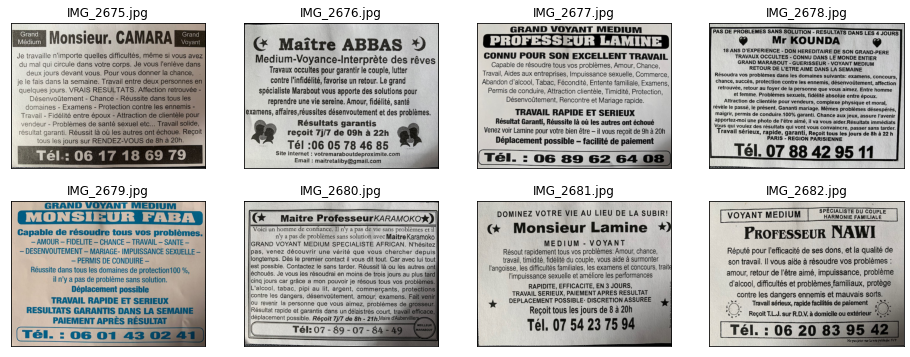

In [2]:
# selection of image
images = []

for file in glob.glob("*.jpg"):
    images.append(file)

# first image delete
images.pop(0)

# image show
plt.figure(figsize=(16, 6))
for n, image in enumerate(images):
    ax = plt.subplot(2, 4, n + 1)
    img = mpimg.imread(image)
    imgplot = plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title(image)

In [3]:
# Include tesseract executable in your path
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# list of name for each image
list_names = []
for element in images:
    list_names.append(element[:-4])

# ocr from tesseract for each image
for image, names in zip(images, list_names):
    img = Image.open(image)
    imgToText = pytesseract.image_to_string(img, lang=None)
    locals()[names] = imgToText

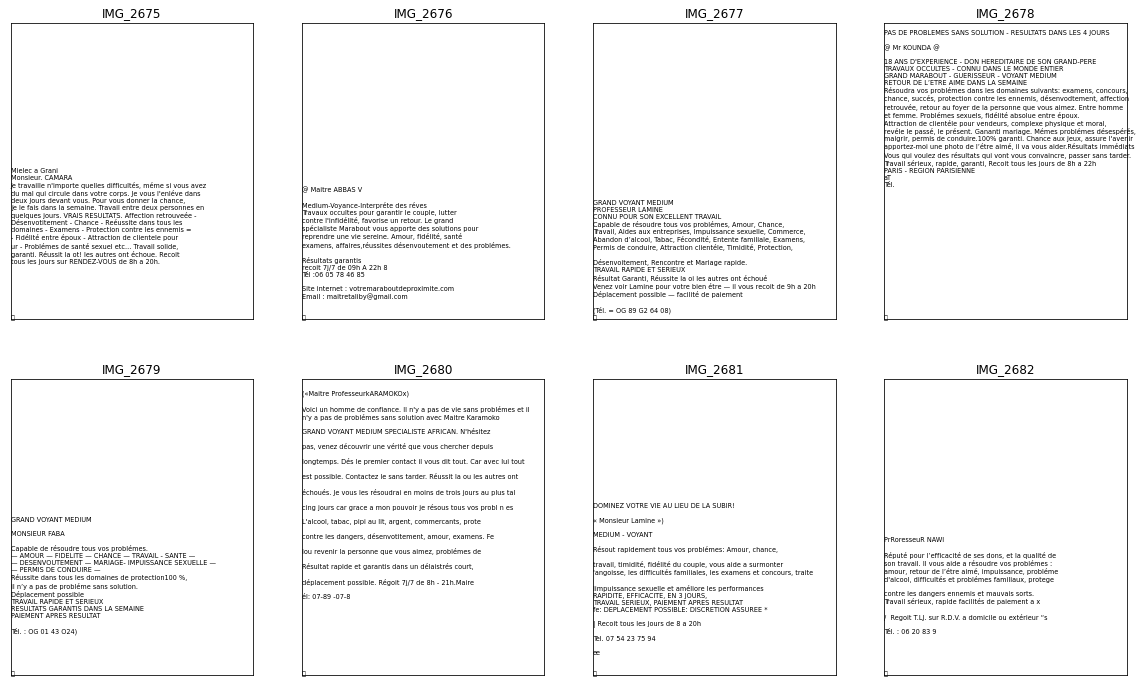

In [4]:
# text show
plt.figure(figsize=(20, 12))
for n, name in enumerate(list_names):
    ax = plt.subplot(2, 4, n + 1)
    plt.text(0,0,locals()[name], fontsize=6.5)
    plt.xticks([])
    plt.yticks([])
    plt.title(name)

In [5]:
# merge texte of each image
textes = str()
for element in list_names:
    textes = textes + locals()[element]

# change in lower each char and remove \n
textes = textes.lower()
textes = textes.replace("\n", "")

textes

"  mielec a granimonsieur. camaraje travaille n'importe quelles difficultés, méme si vous avezdu mal qui circule dans votre corps. je vous i'enléve dansdeux jours devant vous. pour vous donner la chance,je le fais dans la semaine. travail entre deux personnes enquelques jours. vrais resultats. affection retrouveée -désenvotitement - chance - reéussite dans tous lesdomaines - examens - protection contre les ennemis =- fidélité entre époux - attraction de clientele pourur - problémes de santé sexuel etc... travail solide,garanti. réussit la ot! les autres ont échoue. recoittous les jours sur rendez-vous de 8h a 20h.         \x0c @ maitre abbas vmedium-voyance-interpréte des révestravaux occultes pour garantir le couple, luttercontre i'infidélité, favorise un retour. le grandspécialiste marabout vous apporte des solutions pourreprendre une vie sereine. amour, fidélité, santéexamens, affaires,réussites désenvoutement et des problémes.résultats garantisrecoit 7j/7 de 09h a 22h 8tél :06 05 7

In [6]:
# import stopwords de la classe nltk.corpus

# from nltk.tokenize import word_tokenize

# Initialiser la variable des mots vides
french_stopwords = set(stopwords.words('french'))
french_stopwords.update(["a", "=-", "?", "!", ".", ",", ":", ";", "-", "--", "...", "'", '"', "=", "@", "’", "—", "(", ")", "%", "*", "|"])

# textes = word_tokenize(str(textes))

# # fonction stop_words_filtering
# def stop_words_filetring(mots) : 
#     tokens = []
#     for mot in mots:
#         if mot not in french_stopwords:
#             tokens.append(mot)
#     return tokens

# textes = stop_words_filetring(textes)

# textes

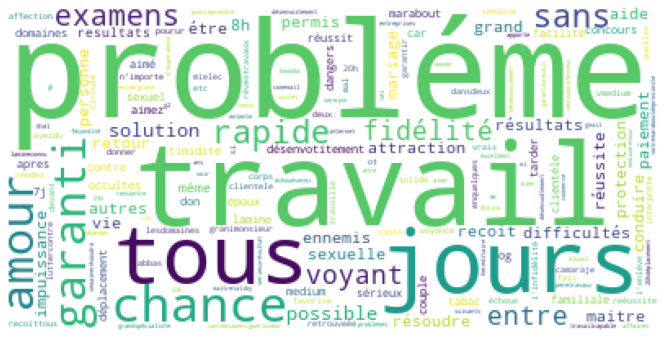

In [7]:
wc = WordCloud(background_color="white", 
               max_words=1000, 
               collocations=False, 
               max_font_size=90, 
               random_state=42, 
               stopwords=french_stopwords)

plt.figure(figsize= (12,6)) # Initialisation d'une figure
wc.generate(textes)
plt.imshow(wc) # Affichage
plt.axis('off')
plt.show()